In [1]:
import pandas as pd
import numpy as np
from IPython.display import Markdown, display
import math as math

In [2]:
#from google.colab import drive
#drive.mount("/content/drive")

In [3]:
#df=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/train.csv")
pd.set_option('display.max_columns', None) # Show all the columns
df = pd.read_csv("/Users/dreama.wmy/Documents/McGill/INSY_695_ML/final_project/Train.csv")

In [4]:
df.head(5)

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,5,3,5,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,1,3,1,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,2,5,5,5,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,5,2,2,2,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,3,4,5,5,3,3,4,4,3,3,3,0,0.0,satisfied


In [5]:
df.columns

Index(['Unnamed: 0', 'id', 'Gender', 'Customer Type', 'Age', 'Type of Travel',
       'Class', 'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes',
       'satisfaction'],
      dtype='object')

In [6]:
df = df.loc[:, ~df.columns.str.contains('^Unnamed')]

In [7]:
df.columns

Index(['id', 'Gender', 'Customer Type', 'Age', 'Type of Travel', 'Class',
       'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes',
       'satisfaction'],
      dtype='object')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 24 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   id                                 103904 non-null  int64  
 1   Gender                             103904 non-null  object 
 2   Customer Type                      103904 non-null  object 
 3   Age                                103904 non-null  int64  
 4   Type of Travel                     103904 non-null  object 
 5   Class                              103904 non-null  object 
 6   Flight Distance                    103904 non-null  int64  
 7   Inflight wifi service              103904 non-null  int64  
 8   Departure/Arrival time convenient  103904 non-null  int64  
 9   Ease of Online booking             103904 non-null  int64  
 10  Gate location                      103904 non-null  int64  
 11  Food and drink                     1039

In [9]:
df.describe()

,id,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
count,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103594.000000
mean,64924.210502,39.379706,1189.448375,2.729683,3.060296,2.756901,2.976883,3.202129,3.250375,3.439396,3.358158,3.382363,3.351055,3.631833,3.304290,3.640428,3.286351,14.815618,15.178678
std,37463.812252,15.114964,997.147281,1.327829,1.525075,1.398929,1.277621,1.329533,1.349509,1.319088,1.332991,1.288354,1.315605,1.180903,1.265396,1.175663,1.312273,38.230901,38.698682
min,1.000000,7.000000,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,32533.750000,27.000000,414.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000
50%,64856.500000,40.000000,843.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,0.000000,0.000000
75%,97368.250000,51.000000,1743.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000
max,129880.000000,85.000000,4983.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1592.000000,1584.000000


In [10]:
#Cleaning column names
df.columns = [c.replace(' ', '_') for c in df.columns]

In [11]:
df.columns

Index(['id', 'Gender', 'Customer_Type', 'Age', 'Type_of_Travel', 'Class',
       'Flight_Distance', 'Inflight_wifi_service',
       'Departure/Arrival_time_convenient', 'Ease_of_Online_booking',
       'Gate_location', 'Food_and_drink', 'Online_boarding', 'Seat_comfort',
       'Inflight_entertainment', 'On-board_service', 'Leg_room_service',
       'Baggage_handling', 'Checkin_service', 'Inflight_service',
       'Cleanliness', 'Departure_Delay_in_Minutes', 'Arrival_Delay_in_Minutes',
       'satisfaction'],
      dtype='object')

In [12]:
#Distribution of categorical and numerical columns

In [13]:
cat_var = ['Gender', 'Customer_Type', 'Type_of_Travel', 'Class']
num_var = ['Age', 'Flight_Distance', 'Inflight_wifi_service',
       'Departure/Arrival_time_convenient', 'Ease_of_Online_booking',
       'Gate_location', 'Food_and_drink', 'Online_boarding', 'Seat_comfort',
       'Inflight_entertainment', 'On-board_service', 'Leg_room_service',
       'Baggage_handling', 'Checkin_service', 'Inflight_service',
       'Cleanliness', 'Departure_Delay_in_Minutes', 'Arrival_Delay_in_Minutes',
       'satisfaction']

In [14]:
#Target variable
unique_values = df['satisfaction'].unique()
unique_values

array(['neutral or dissatisfied', 'satisfied'], dtype=object)

In [15]:
df['satisfaction'] = df['satisfaction'].replace({'satisfied': 1, 'neutral or dissatisfied': 0})

In [16]:
df['satisfaction'].value_counts()

0    58879
1    45025
Name: satisfaction, dtype: int64

## 1. EDA - Exploratory Data Analysis

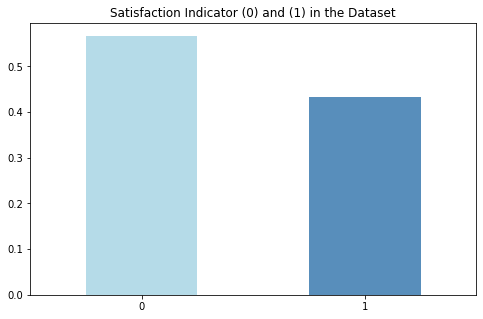

In [61]:
import matplotlib.pyplot as plt 
fig = plt.figure(figsize = (8,5))
df.satisfaction.value_counts(normalize = True).plot(kind='bar', color= ['lightblue','steelblue'], alpha = 0.9, rot=0)
plt.title('Satisfaction Indicator (0) and (1) in the Dataset')
plt.show()

In [18]:
df.isnull().sum().sort_values(ascending=False)
#Null values found in Arrival_Delay_in_minues column

Arrival_Delay_in_Minutes             310
id                                     0
Gender                                 0
Departure_Delay_in_Minutes             0
Cleanliness                            0
Inflight_service                       0
Checkin_service                        0
Baggage_handling                       0
Leg_room_service                       0
On-board_service                       0
Inflight_entertainment                 0
Seat_comfort                           0
Online_boarding                        0
Food_and_drink                         0
Gate_location                          0
Ease_of_Online_booking                 0
Departure/Arrival_time_convenient      0
Inflight_wifi_service                  0
Flight_Distance                        0
Class                                  0
Type_of_Travel                         0
Age                                    0
Customer_Type                          0
satisfaction                           0
dtype: int64

In [19]:
cat_var = ['Gender', 'Customer_Type', 'Type_of_Travel', 'Class']

In [20]:
for c in cat_var:
    print("{} \n".format(df[c].value_counts()))

Female    52727
Male      51177
Name: Gender, dtype: int64 

Loyal Customer       84923
disloyal Customer    18981
Name: Customer_Type, dtype: int64 

Business travel    71655
Personal Travel    32249
Name: Type_of_Travel, dtype: int64 

Business    49665
Eco         46745
Eco Plus     7494
Name: Class, dtype: int64 



/Users/dreama.wmy/opt/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:3704: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/Users/dreama.wmy/opt/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:3710: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


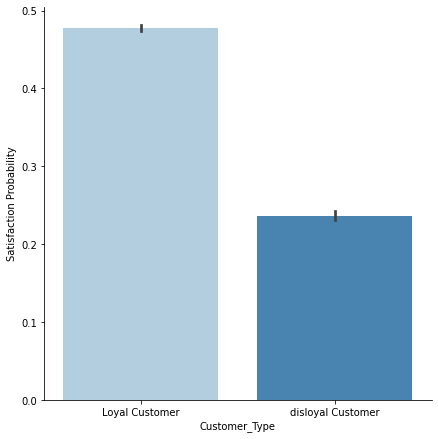

In [21]:
import seaborn as sns
g=sns.factorplot(x="Customer_Type",y="satisfaction",data=df,kind="bar",size=6,palette = "Blues")
g.set_ylabels("Satisfaction Probability")
plt.show()

/Users/dreama.wmy/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


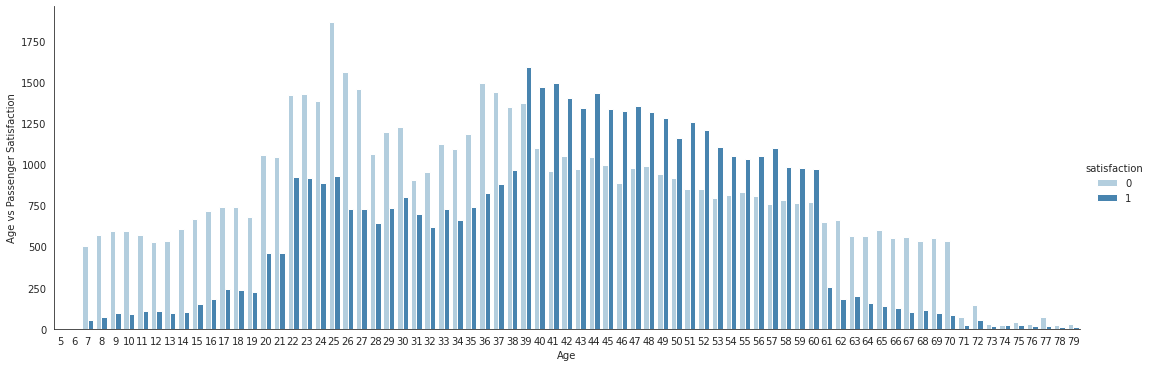

In [22]:
with sns.axes_style('white'):
    g = sns.catplot("Age", data=df, aspect=3.0, kind='count', hue='satisfaction', order=range(5, 80),palette = "Blues")
    g.set_ylabels('Age vs Passenger Satisfaction')

/Users/dreama.wmy/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


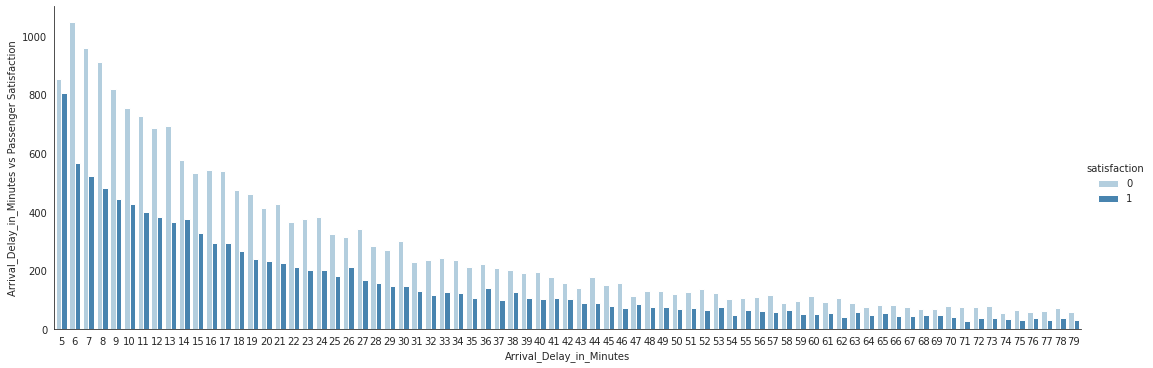

In [23]:
with sns.axes_style('white'):
    g = sns.catplot("Arrival_Delay_in_Minutes", data=df, aspect=3.0, kind='count', hue='satisfaction', order=range(5, 80),palette = "Blues")
    g.set_ylabels('Arrival_Delay_in_Minutes vs Passenger Satisfaction')

/Users/dreama.wmy/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


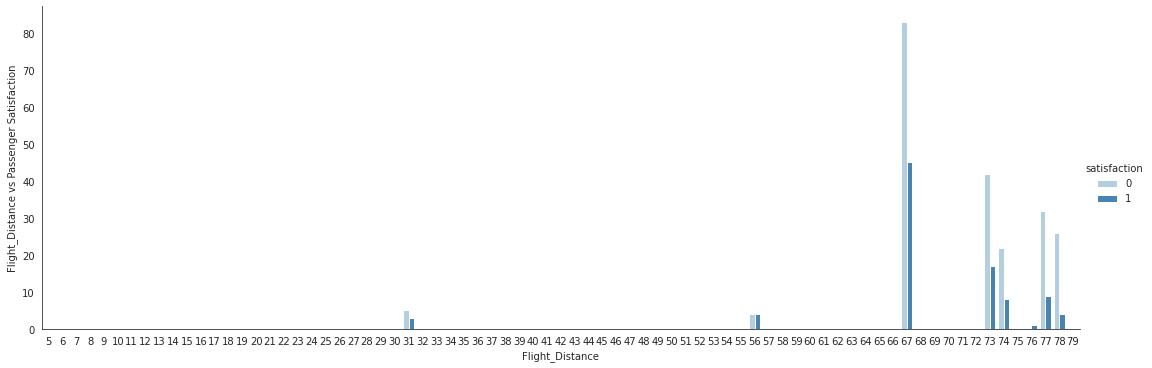

In [24]:
with sns.axes_style('white'):
    g = sns.catplot("Flight_Distance", data=df, aspect=3.0, kind='count', hue='satisfaction', order=range(5, 80),palette = "Blues")
    g.set_ylabels('Flight_Distance vs Passenger Satisfaction')

In [25]:
df.columns

Index(['id', 'Gender', 'Customer_Type', 'Age', 'Type_of_Travel', 'Class',
       'Flight_Distance', 'Inflight_wifi_service',
       'Departure/Arrival_time_convenient', 'Ease_of_Online_booking',
       'Gate_location', 'Food_and_drink', 'Online_boarding', 'Seat_comfort',
       'Inflight_entertainment', 'On-board_service', 'Leg_room_service',
       'Baggage_handling', 'Checkin_service', 'Inflight_service',
       'Cleanliness', 'Departure_Delay_in_Minutes', 'Arrival_Delay_in_Minutes',
       'satisfaction'],
      dtype='object')

<AxesSubplot:xlabel='Age', ylabel='Count'>

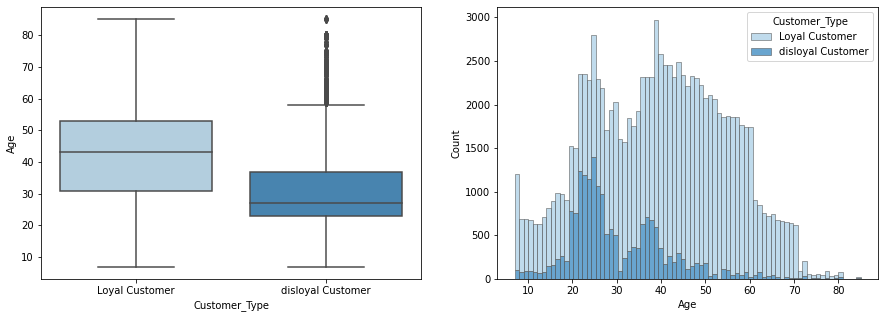

In [26]:
f, ax = plt.subplots(1, 2, figsize = (15,5))
sns.boxplot(x = "Customer_Type", y = "Age", palette = "Blues", data = df, ax = ax[0])
sns.histplot(df, x = "Age", hue = "Customer_Type", multiple = "stack", palette = "Blues", edgecolor = ".3", linewidth = .5, ax = ax[1])

<AxesSubplot:xlabel='Age', ylabel='Count'>

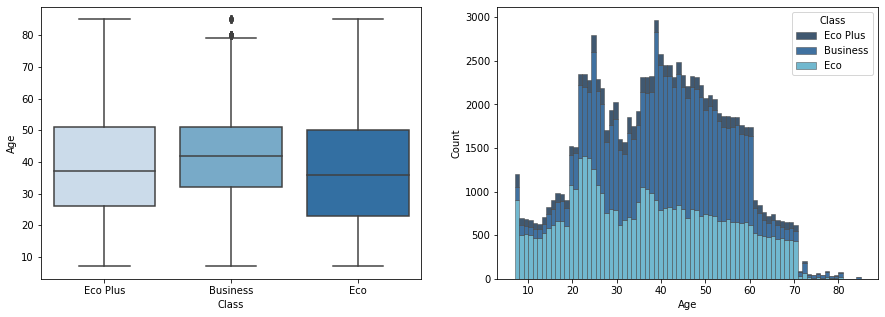

In [27]:
f, ax = plt.subplots(1, 2, figsize = (15,5))
sns.boxplot(x = "Class", y = "Age", palette = "Blues", data = df, ax = ax[0])
sns.histplot(df, x = "Age", hue = "Class", multiple = "stack", palette = "ocean", edgecolor = ".3", linewidth = .5, ax = ax[1])

<AxesSubplot:xlabel='Age', ylabel='Count'>

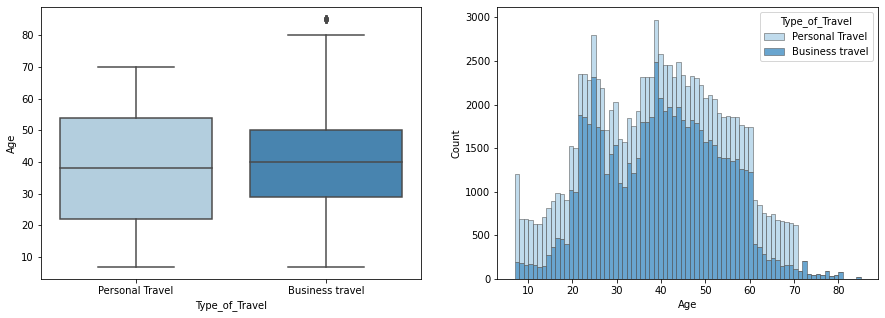

In [28]:
f, ax = plt.subplots(1, 2, figsize = (15,5))
sns.boxplot(x = "Type_of_Travel", y = "Age", palette = "Blues", data = df, ax = ax[0])
sns.histplot(df, x = "Age", hue = "Type_of_Travel", multiple = "stack", palette = "Blues", edgecolor = ".3", linewidth = .5, ax = ax[1])

<AxesSubplot:xlabel='Flight_Distance', ylabel='Count'>

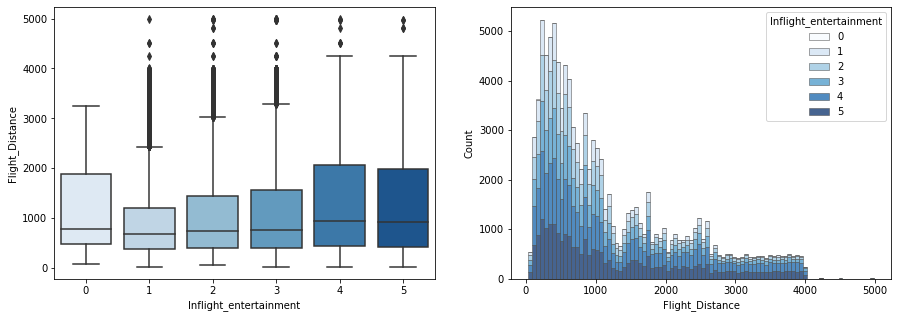

In [40]:
f, ax = plt.subplots(1, 2, figsize = (15,5))
sns.boxplot(x = "Inflight_entertainment", y = "Flight_Distance", palette = "Blues", data = df, ax = ax[0])
sns.histplot(df, x = "Flight_Distance", hue = "Inflight_entertainment", multiple = "stack", palette = "Blues", edgecolor = ".3", linewidth = .5, ax = ax[1])

<AxesSubplot:xlabel='Flight_Distance', ylabel='Count'>

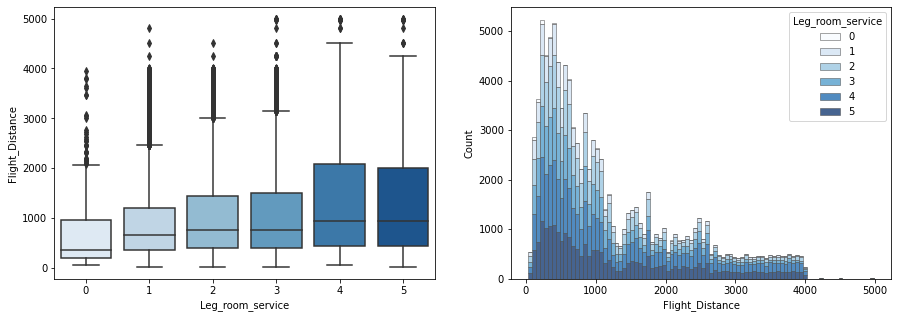

In [38]:
f, ax = plt.subplots(1, 2, figsize = (15,5))
sns.boxplot(x = "Leg_room_service", y = "Flight_Distance", palette = "Blues", data = df, ax = ax[0])
sns.histplot(df, x = "Flight_Distance", hue = "Leg_room_service", multiple = "stack", palette = "Blues", edgecolor = ".3", linewidth = .5, ax = ax[1])

/Users/dreama.wmy/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


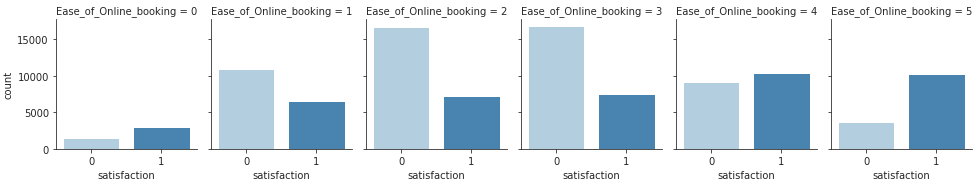

In [60]:
with sns.axes_style(style='ticks'):
    g = sns.catplot("satisfaction", col="Ease_of_Online_booking", col_wrap=6, data=df, kind="count", height=2.5, aspect=.9,palette = "Blues")

/Users/dreama.wmy/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


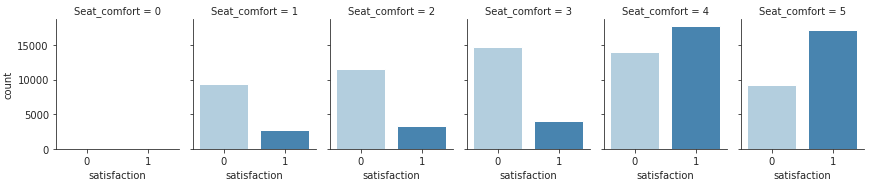

In [62]:
with sns.axes_style(style='ticks'):
    g = sns.catplot("satisfaction", col="Seat_comfort", col_wrap=6, data=df, kind="count", height=2.5, aspect=.8,palette = "Blues")

/Users/dreama.wmy/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


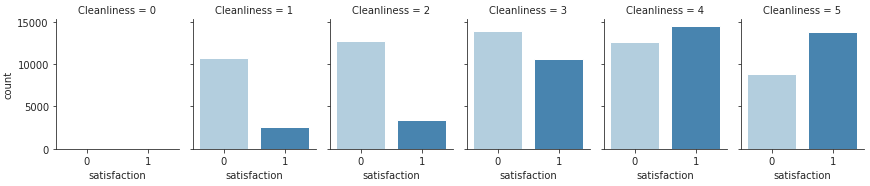

In [66]:
with sns.axes_style(style='ticks'):
    g = sns.catplot("satisfaction", col="Cleanliness", col_wrap=6, data=df, kind="count", height=2.5, aspect=.8,palette = "Blues")

/Users/dreama.wmy/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


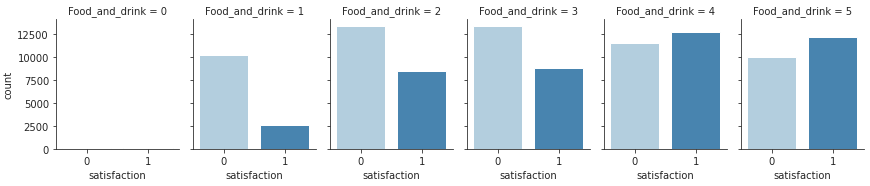

In [65]:
with sns.axes_style(style='ticks'):
    g = sns.catplot("satisfaction", col="Food_and_drink", col_wrap=6, data=df, kind="count", height=2.5, aspect=.8,palette = "Blues")

<AxesSubplot:xlabel='Class', ylabel='count'>

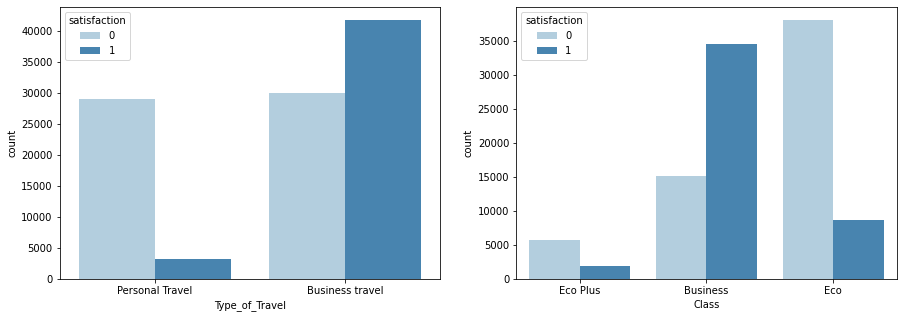

In [51]:
f, ax = plt.subplots(1, 2, figsize = (15,5))
sns.countplot(x = 'Type_of_Travel', hue = 'satisfaction', palette = "Blues", data = df, ax = ax[0])
sns.countplot(x = 'Class', hue = 'satisfaction', palette = "Blues", data = df, ax = ax[1])

<AxesSubplot:xlabel='Departure/Arrival_time_convenient', ylabel='count'>

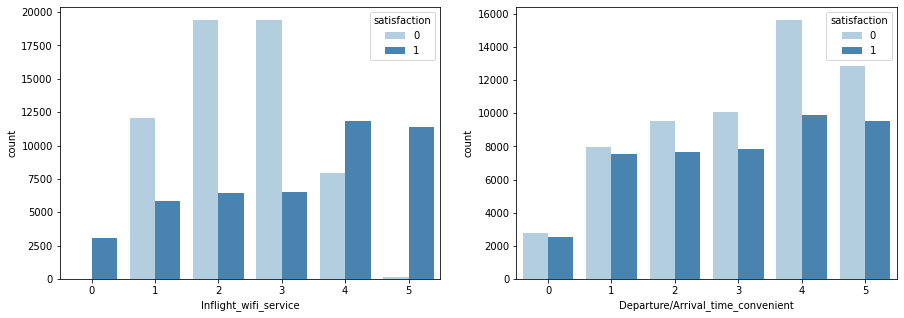

In [53]:
f, ax = plt.subplots(1, 2, figsize = (15,5))
sns.countplot(x = 'Inflight_wifi_service', hue = 'satisfaction', palette = "Blues", data = df, ax = ax[0])
sns.countplot(x = 'Departure/Arrival_time_convenient', hue = 'satisfaction', palette = "Blues", data = df, ax = ax[1])

<AxesSubplot:xlabel='Gate_location', ylabel='count'>

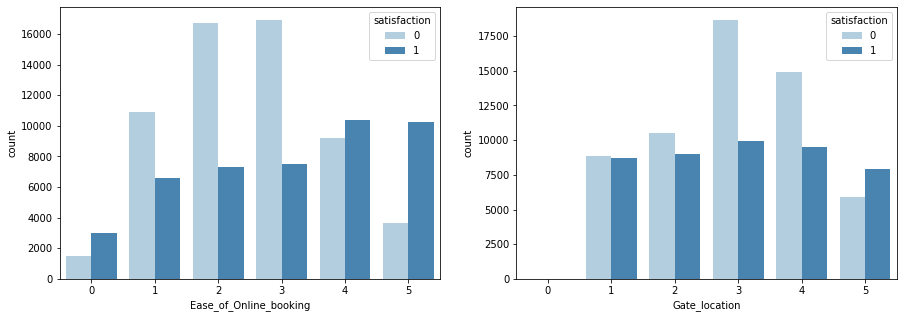

In [55]:
f, ax = plt.subplots(1, 2, figsize = (15,5))
sns.countplot(x = 'Ease_of_Online_booking', hue = 'satisfaction', palette = "Blues", data = df, ax = ax[0])
sns.countplot(x = 'Gate_location', hue = 'satisfaction', palette = "Blues", data = df, ax = ax[1])

In [71]:
def list_column_values(df, number_of_values, print_all):
    display(Markdown('**Results:**' ))
    for col in df.columns[0:]:
        if df[col].nunique() <= number_of_values:
            print(f"{col.ljust(25)}" +  ' ==> ' + str(df[col].sort_values().unique().tolist()) )
        else:  
            if print_all=='True':
               print(f"{col.ljust(25)}" + ' ==> more than ' + str(number_of_values) + ' values')

In [72]:
list_column_values(df,3,'False')

**Results:**

Gender                    ==> ['Female', 'Male']
Customer_Type             ==> ['Loyal Customer', 'disloyal Customer']
Type_of_Travel            ==> ['Business travel', 'Personal Travel']
Class                     ==> ['Business', 'Eco', 'Eco Plus']
satisfaction              ==> [0, 1]


In [73]:
list_column_values(df,15,'True')

**Results:**

id                        ==> more than 15 values
Gender                    ==> ['Female', 'Male']
Customer_Type             ==> ['Loyal Customer', 'disloyal Customer']
Age                       ==> more than 15 values
Type_of_Travel            ==> ['Business travel', 'Personal Travel']
Class                     ==> ['Business', 'Eco', 'Eco Plus']
Flight_Distance           ==> more than 15 values
Inflight_wifi_service     ==> [0, 1, 2, 3, 4, 5]
Departure/Arrival_time_convenient ==> [0, 1, 2, 3, 4, 5]
Ease_of_Online_booking    ==> [0, 1, 2, 3, 4, 5]
Gate_location             ==> [0, 1, 2, 3, 4, 5]
Food_and_drink            ==> [0, 1, 2, 3, 4, 5]
Online_boarding           ==> [0, 1, 2, 3, 4, 5]
Seat_comfort              ==> [0, 1, 2, 3, 4, 5]
Inflight_entertainment    ==> [0, 1, 2, 3, 4, 5]
On-board_service          ==> [0, 1, 2, 3, 4, 5]
Leg_room_service          ==> [0, 1, 2, 3, 4, 5]
Baggage_handling          ==> [1, 2, 3, 4, 5]
Checkin_service           ==> [0, 1, 2, 3, 4, 5]
Infligh

In [74]:
def plot_numerical_columns(df):
    df = df[df.select_dtypes([np.int64,np.float64]).columns]
    lcols = 2
    lrows = math.ceil(len(df.columns)/lcols)
    plt.figure(figsize=(20,20))
    plt.subplots_adjust(wspace=0.2, hspace=0.5) 
    for i, column in enumerate(df.columns):
        plt.subplot(lrows,lcols,i+1)
        sns.distplot(df[column])

/Users/dreama.wmy/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/dreama.wmy/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/dreama.wmy/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function w

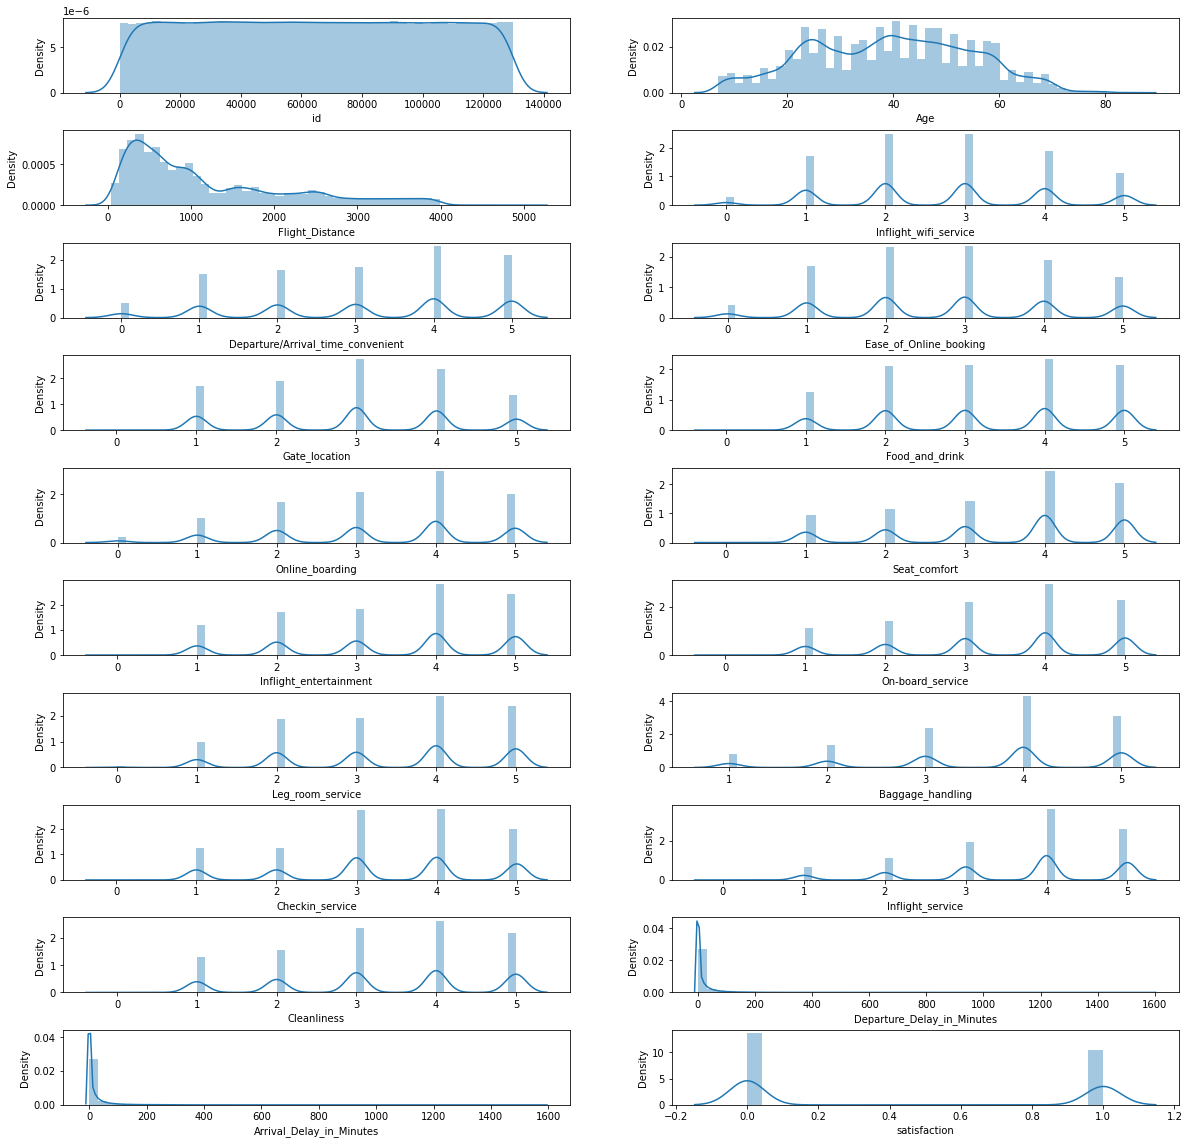

In [75]:
plot_numerical_columns(df)

Ordinal Encoding

In [76]:
df['Class'].unique().tolist()

['Eco Plus', 'Business', 'Eco']

In [77]:
def ordinalencoder(df_col, categories ):
    '''
    Ordinal Encoder function
    '''
    # Using pandas factorize method for ordinal data
    l_categories = pd.Categorical(df_col, categories=['Business','Eco Plus','Eco'], ordered=True)
    l_col = df_col.name
    # Factorizing the column data
    labels, unique = pd.factorize(l_categories, sort=True)
    df_col = labels
    display(Markdown('**Results:**'))
    print('Conversion applied to column: {}'.format(l_col))
    return df_col

In [78]:
categories=['Business','Eco Plus','Eco']

df['Class'] = ordinalencoder(df['Class'], categories)

**Results:**

Conversion applied to column: Class


In [79]:
df['Class'].unique().tolist()

[1, 0, 2]

In [80]:
df.columns

Index(['id', 'Gender', 'Customer_Type', 'Age', 'Type_of_Travel', 'Class',
       'Flight_Distance', 'Inflight_wifi_service',
       'Departure/Arrival_time_convenient', 'Ease_of_Online_booking',
       'Gate_location', 'Food_and_drink', 'Online_boarding', 'Seat_comfort',
       'Inflight_entertainment', 'On-board_service', 'Leg_room_service',
       'Baggage_handling', 'Checkin_service', 'Inflight_service',
       'Cleanliness', 'Departure_Delay_in_Minutes', 'Arrival_Delay_in_Minutes',
       'satisfaction'],
      dtype='object')

One Hot Encoding

In [81]:
def one_hot_encoder(df, cat_cols ):
    '''
    One-Hot Encoder function
    '''
    print('Creating OHE features..\nOld df shape:{}'.format(df.shape))
    df = pd.get_dummies(df, columns=cat_cols)
    print('New df shape:{}'.format(df.shape))
    return df

In [82]:
cat_cols = ['Gender','Customer_Type','Type_of_Travel']
df = one_hot_encoder(df,cat_cols)

Creating OHE features..
Old df shape:(103904, 24)
New df shape:(103904, 27)


In [83]:
df.shape

(103904, 27)

In [84]:
df.columns

Index(['id', 'Age', 'Class', 'Flight_Distance', 'Inflight_wifi_service',
       'Departure/Arrival_time_convenient', 'Ease_of_Online_booking',
       'Gate_location', 'Food_and_drink', 'Online_boarding', 'Seat_comfort',
       'Inflight_entertainment', 'On-board_service', 'Leg_room_service',
       'Baggage_handling', 'Checkin_service', 'Inflight_service',
       'Cleanliness', 'Departure_Delay_in_Minutes', 'Arrival_Delay_in_Minutes',
       'satisfaction', 'Gender_Female', 'Gender_Male',
       'Customer_Type_Loyal Customer', 'Customer_Type_disloyal Customer',
       'Type_of_Travel_Business travel', 'Type_of_Travel_Personal Travel'],
      dtype='object')

In [85]:
#Remove ID column
df = df.drop('id', axis=1)

In [86]:
df.columns

Index(['Age', 'Class', 'Flight_Distance', 'Inflight_wifi_service',
       'Departure/Arrival_time_convenient', 'Ease_of_Online_booking',
       'Gate_location', 'Food_and_drink', 'Online_boarding', 'Seat_comfort',
       'Inflight_entertainment', 'On-board_service', 'Leg_room_service',
       'Baggage_handling', 'Checkin_service', 'Inflight_service',
       'Cleanliness', 'Departure_Delay_in_Minutes', 'Arrival_Delay_in_Minutes',
       'satisfaction', 'Gender_Female', 'Gender_Male',
       'Customer_Type_Loyal Customer', 'Customer_Type_disloyal Customer',
       'Type_of_Travel_Business travel', 'Type_of_Travel_Personal Travel'],
      dtype='object')

In [87]:
df.head(3)

,Age,Class,Flight_Distance,Inflight_wifi_service,Departure/Arrival_time_convenient,Ease_of_Online_booking,Gate_location,Food_and_drink,Online_boarding,Seat_comfort,Inflight_entertainment,On-board_service,Leg_room_service,Baggage_handling,Checkin_service,Inflight_service,Cleanliness,Departure_Delay_in_Minutes,Arrival_Delay_in_Minutes,satisfaction,Gender_Female,Gender_Male,Customer_Type_Loyal Customer,Customer_Type_disloyal Customer,Type_of_Travel_Business travel,Type_of_Travel_Personal Travel
0,13,1,460,3,4,3,1,5,3,5,5,4,3,4,4,5,5,25,18.0,0,0,1,1,0,0,1
1,25,0,235,3,2,3,3,1,3,1,1,1,5,3,1,4,1,1,6.0,0,0,1,0,1,1,0
2,26,0,1142,2,2,2,2,5,5,5,5,4,3,4,4,4,5,0,0.0,1,1,0,1,0,1,0


### Service Satisfaction Level

<AxesSubplot:xlabel='Inflight_service', ylabel='satisfaction'>

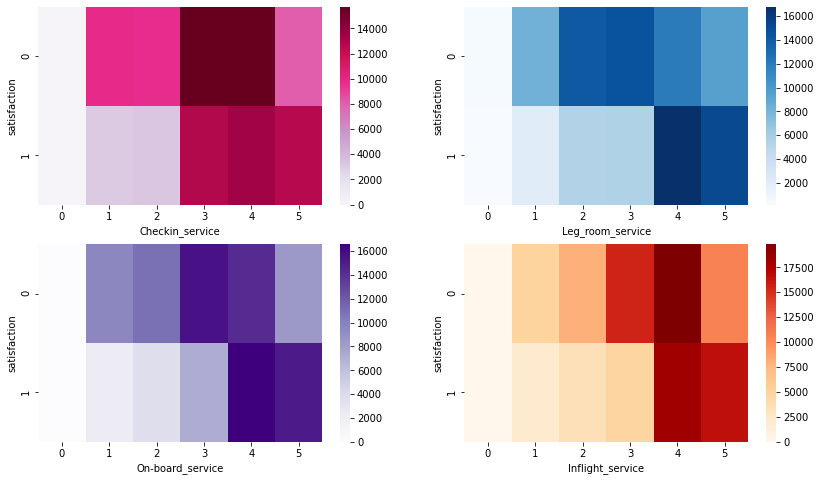

In [88]:
# Checkin_service, Leg_room_service, On-board_service and Inflight_service

fig, axarr = plt.subplots(2, 2, figsize=(14, 8))

table1 = pd.crosstab(df['satisfaction'], df['Checkin_service'])
sns.heatmap(table1, cmap='PuRd', ax = axarr[0][0])
table2 = pd.crosstab(df['satisfaction'], df['Leg_room_service'])
sns.heatmap(table2, cmap='Blues', ax = axarr[0][1])
table3 = pd.crosstab(df['satisfaction'], df['On-board_service'])
sns.heatmap(table3, cmap='Purples', ax = axarr[1][0])
table4 = pd.crosstab(df['satisfaction'], df['Inflight_service'])
sns.heatmap(table4, cmap='OrRd', ax = axarr[1][1])

<ipython-input-90-7619878f677b>:2: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.triu(np.ones_like(corr, dtype=np.bool))


<AxesSubplot:>

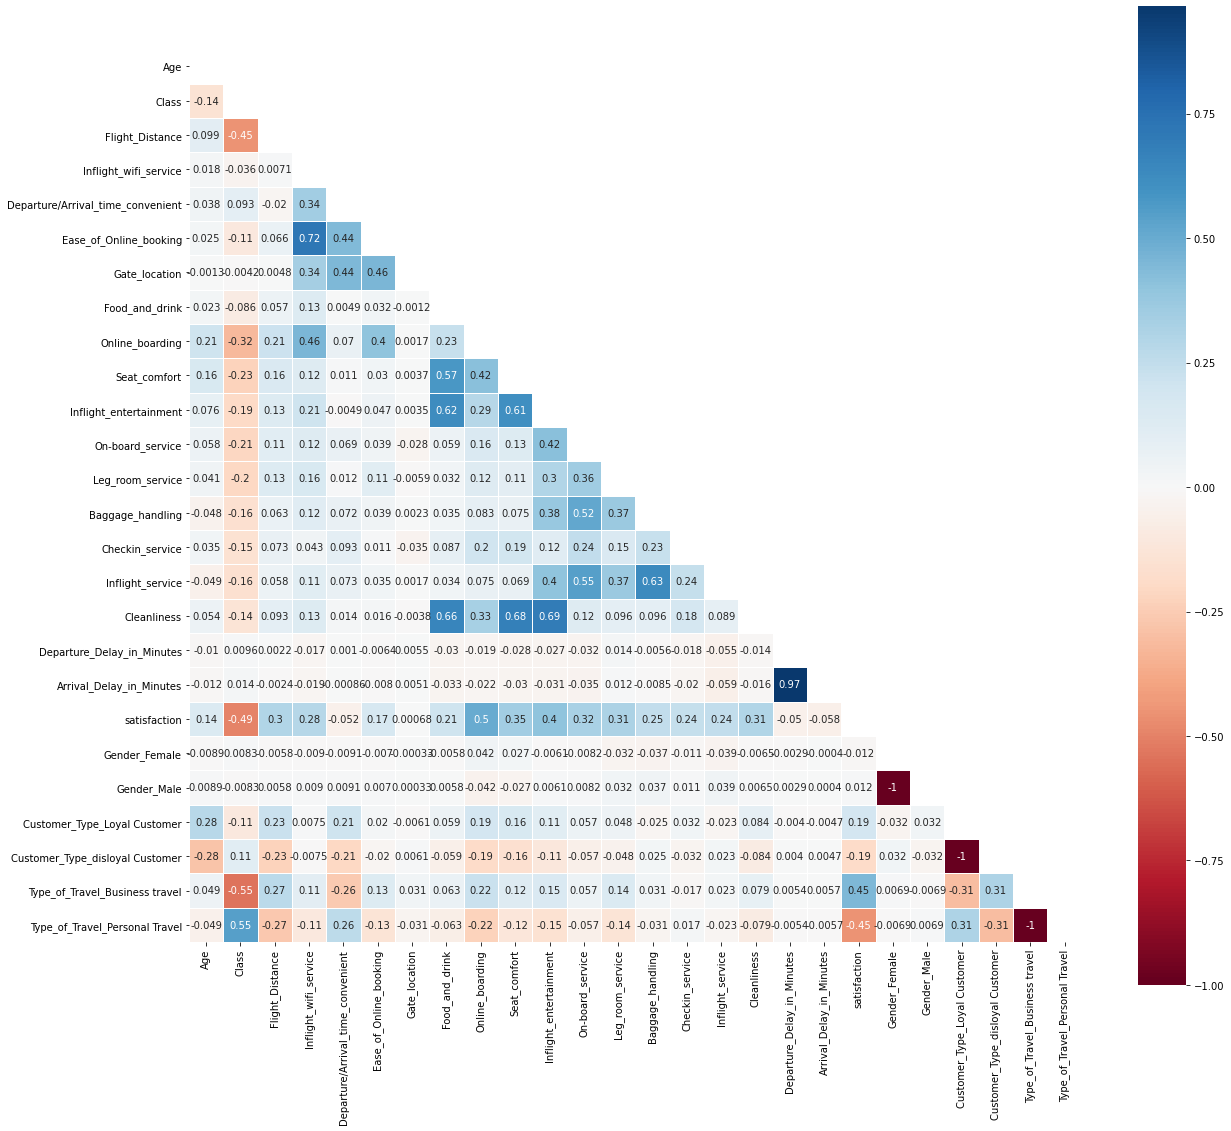

In [90]:
corr = df.corr()
mask = np.triu(np.ones_like(corr, dtype=np.bool))
f, ax = plt.subplots(figsize=(20, 20))
sns.heatmap(corr, mask=mask, cmap='RdBu', vmax=None, center=0,square=True, annot=True, linewidths=.5, cbar_kws={"shrink": .9})

arrival delay and departure delay is highly corrlated, so we decided to remove the arrival delay.

In [95]:
df2 = df.drop(columns =['Gender_Female','Arrival_Delay_in_Minutes','Type_of_Travel_Personal Travel',
              'Customer_Type_disloyal Customer'])
df2.head(3)

,Age,Class,Flight_Distance,Inflight_wifi_service,Departure/Arrival_time_convenient,Ease_of_Online_booking,Gate_location,Food_and_drink,Online_boarding,Seat_comfort,Inflight_entertainment,On-board_service,Leg_room_service,Baggage_handling,Checkin_service,Inflight_service,Cleanliness,Departure_Delay_in_Minutes,satisfaction,Gender_Male,Customer_Type_Loyal Customer,Type_of_Travel_Business travel
0,13,1,460,3,4,3,1,5,3,5,5,4,3,4,4,5,5,25,0,1,1,0
1,25,0,235,3,2,3,3,1,3,1,1,1,5,3,1,4,1,1,0,1,0,1
2,26,0,1142,2,2,2,2,5,5,5,5,4,3,4,4,4,5,0,1,0,1,1


<ipython-input-96-edf84f39449f>:2: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.triu(np.ones_like(corr, dtype=np.bool))


<AxesSubplot:>

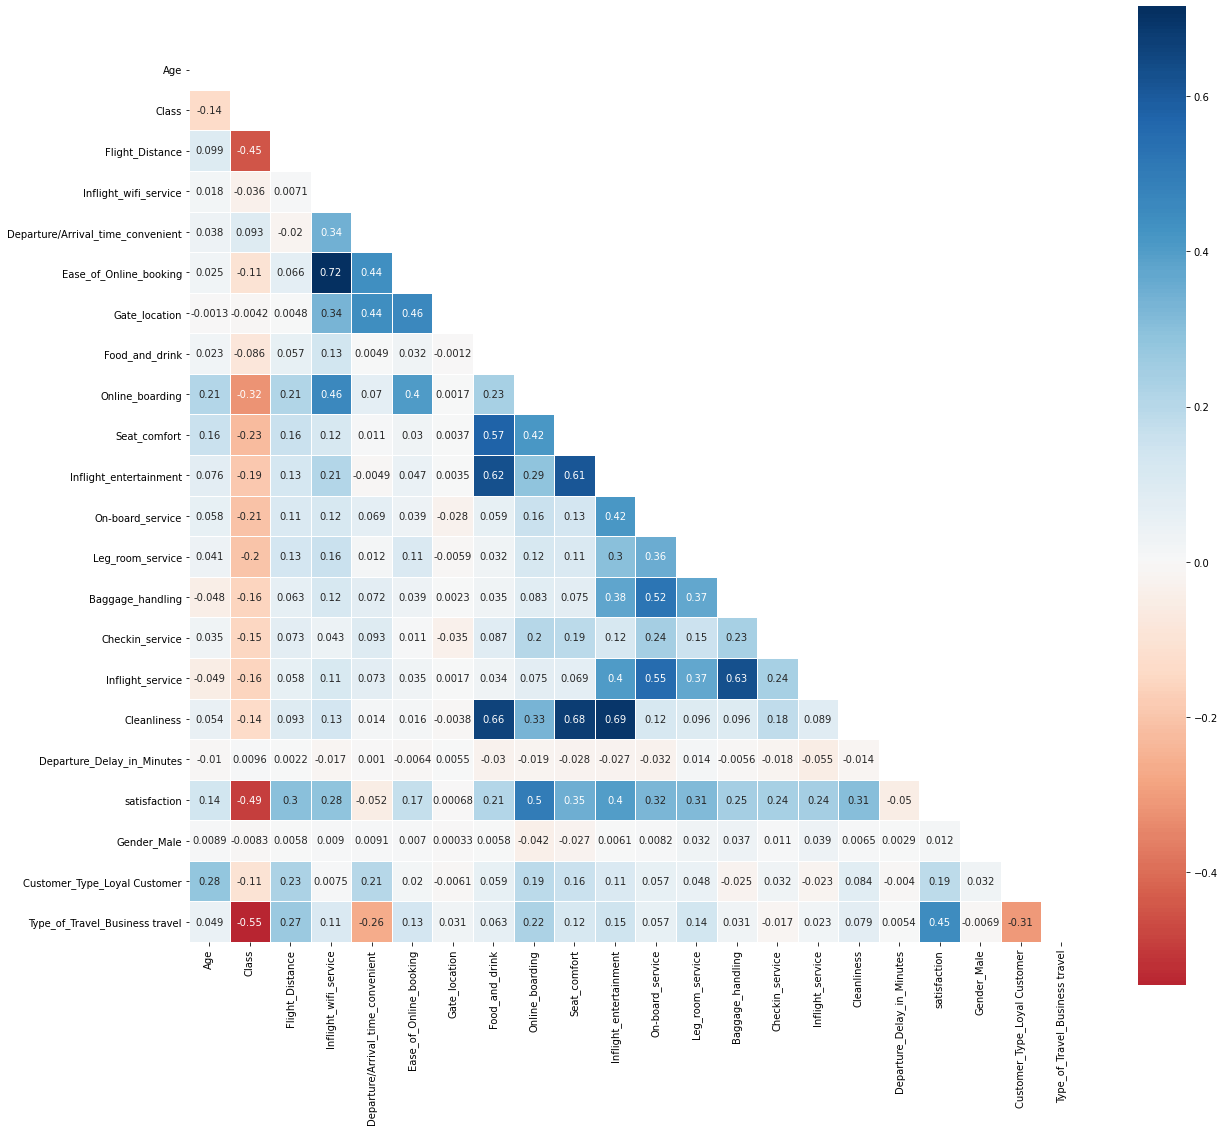

In [96]:
corr = df2.corr()
mask = np.triu(np.ones_like(corr, dtype=np.bool))
f, ax = plt.subplots(figsize=(20, 20))
sns.heatmap(corr, mask=mask, cmap='RdBu', vmax=None, center=0,square=True, annot=True, linewidths=.5, cbar_kws={"shrink": .9})

In [98]:
df2.isnull().sum().sort_values(ascending=False)

Age                                  0
Class                                0
Customer_Type_Loyal Customer         0
Gender_Male                          0
satisfaction                         0
Departure_Delay_in_Minutes           0
Cleanliness                          0
Inflight_service                     0
Checkin_service                      0
Baggage_handling                     0
Leg_room_service                     0
On-board_service                     0
Inflight_entertainment               0
Seat_comfort                         0
Online_boarding                      0
Food_and_drink                       0
Gate_location                        0
Ease_of_Online_booking               0
Departure/Arrival_time_convenient    0
Inflight_wifi_service                0
Flight_Distance                      0
Type_of_Travel_Business travel       0
dtype: int64

### since there is no missing value, we pretend there are some age information missing in the dataset

In [101]:
len(df2.Age)

103904

In [106]:
df3 = df2.copy()

np.random.seed(0)
random_indices = np.random.choice(df3.index, size=100, replace=False)

df3.loc[random_indices, 'Age'] = np.nan

In [107]:
df3.isnull().sum().sort_values(ascending=False)

Age                                  100
Class                                  0
Customer_Type_Loyal Customer           0
Gender_Male                            0
satisfaction                           0
Departure_Delay_in_Minutes             0
Cleanliness                            0
Inflight_service                       0
Checkin_service                        0
Baggage_handling                       0
Leg_room_service                       0
On-board_service                       0
Inflight_entertainment                 0
Seat_comfort                           0
Online_boarding                        0
Food_and_drink                         0
Gate_location                          0
Ease_of_Online_booking                 0
Departure/Arrival_time_convenient      0
Inflight_wifi_service                  0
Flight_Distance                        0
Type_of_Travel_Business travel         0
dtype: int64

## 2. Missing Value - SimpleImputer

In [114]:
null_rows_idx = df3.isnull().any(axis=1)

df3.loc[null_rows_idx].head(3)

,Age,Class,Flight_Distance,Inflight_wifi_service,Departure/Arrival_time_convenient,Ease_of_Online_booking,Gate_location,Food_and_drink,Online_boarding,Seat_comfort,Inflight_entertainment,On-board_service,Leg_room_service,Baggage_handling,Checkin_service,Inflight_service,Cleanliness,Departure_Delay_in_Minutes,satisfaction,Gender_Male,Customer_Type_Loyal Customer,Type_of_Travel_Business travel
216,NaN,2,214,1,4,1,2,2,1,1,2,4,3,5,4,5,2,16,0,1,1,0
375,NaN,1,174,5,3,5,3,5,5,5,5,5,1,5,3,5,5,0,1,0,1,1
1049,NaN,0,302,2,1,1,1,5,4,4,2,2,2,2,1,2,2,2,0,0,1,1


In [115]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy="median")

df3_num = df3.select_dtypes(include=[np.number])

imputer.fit(df3_num)

SimpleImputer(strategy='median')

In [116]:
X_ = imputer.transform(df3_num)

df4 = pd.DataFrame(X_, columns=df3_num.columns,
                          index=df3_num.index)

In [117]:
df4.loc[null_rows_idx].head(3)

,Age,Class,Flight_Distance,Inflight_wifi_service,Departure/Arrival_time_convenient,Ease_of_Online_booking,Gate_location,Food_and_drink,Online_boarding,Seat_comfort,Inflight_entertainment,On-board_service,Leg_room_service,Baggage_handling,Checkin_service,Inflight_service,Cleanliness,Departure_Delay_in_Minutes,satisfaction,Gender_Male,Customer_Type_Loyal Customer,Type_of_Travel_Business travel
216,40.0,2.0,214.0,1.0,4.0,1.0,2.0,2.0,1.0,1.0,2.0,4.0,3.0,5.0,4.0,5.0,2.0,16.0,0.0,1.0,1.0,0.0
375,40.0,1.0,174.0,5.0,3.0,5.0,3.0,5.0,5.0,5.0,5.0,5.0,1.0,5.0,3.0,5.0,5.0,0.0,1.0,0.0,1.0,1.0
1049,40.0,0.0,302.0,2.0,1.0,1.0,1.0,5.0,4.0,4.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,0.0,0.0,1.0,1.0


In [118]:
df4.head(3)

,Age,Class,Flight_Distance,Inflight_wifi_service,Departure/Arrival_time_convenient,Ease_of_Online_booking,Gate_location,Food_and_drink,Online_boarding,Seat_comfort,Inflight_entertainment,On-board_service,Leg_room_service,Baggage_handling,Checkin_service,Inflight_service,Cleanliness,Departure_Delay_in_Minutes,satisfaction,Gender_Male,Customer_Type_Loyal Customer,Type_of_Travel_Business travel
0,13.0,1.0,460.0,3.0,4.0,3.0,1.0,5.0,3.0,5.0,5.0,4.0,3.0,4.0,4.0,5.0,5.0,25.0,0.0,1.0,1.0,0.0
1,25.0,0.0,235.0,3.0,2.0,3.0,3.0,1.0,3.0,1.0,1.0,1.0,5.0,3.0,1.0,4.0,1.0,1.0,0.0,1.0,0.0,1.0
2,26.0,0.0,1142.0,2.0,2.0,2.0,2.0,5.0,5.0,5.0,5.0,4.0,3.0,4.0,4.0,4.0,5.0,0.0,1.0,0.0,1.0,1.0


## 3. Remove Outliers

In [119]:
from sklearn.ensemble import IsolationForest

isolation_forest = IsolationForest(random_state=42)
outlier_pred = isolation_forest.fit_predict(X_)

In [120]:
df5 = df4.iloc[outlier_pred == 1]
df5.head(3)

,Age,Class,Flight_Distance,Inflight_wifi_service,Departure/Arrival_time_convenient,Ease_of_Online_booking,Gate_location,Food_and_drink,Online_boarding,Seat_comfort,Inflight_entertainment,On-board_service,Leg_room_service,Baggage_handling,Checkin_service,Inflight_service,Cleanliness,Departure_Delay_in_Minutes,satisfaction,Gender_Male,Customer_Type_Loyal Customer,Type_of_Travel_Business travel
2,26.0,0.0,1142.0,2.0,2.0,2.0,2.0,5.0,5.0,5.0,5.0,4.0,3.0,4.0,4.0,4.0,5.0,0.0,1.0,0.0,1.0,1.0
4,61.0,0.0,214.0,3.0,3.0,3.0,3.0,4.0,5.0,5.0,3.0,3.0,4.0,4.0,3.0,3.0,3.0,0.0,1.0,1.0,1.0,1.0
6,47.0,2.0,1276.0,2.0,4.0,2.0,3.0,2.0,2.0,2.0,2.0,3.0,3.0,4.0,3.0,5.0,2.0,9.0,0.0,1.0,1.0,0.0


In [121]:
df5.shape

(43959, 22)

In [133]:
X = df5.drop("satisfaction", axis=1)
y = df5.satisfaction

## 4. Feature Scaling

In [134]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_std = scaler.fit_transform(X)
X_std = pd.DataFrame(X_std, columns=X.columns)

In [135]:
X_std.head(3)

,Age,Class,Flight_Distance,Inflight_wifi_service,Departure/Arrival_time_convenient,Ease_of_Online_booking,Gate_location,Food_and_drink,Online_boarding,Seat_comfort,Inflight_entertainment,On-board_service,Leg_room_service,Baggage_handling,Checkin_service,Inflight_service,Cleanliness,Departure_Delay_in_Minutes,Gender_Male,Customer_Type_Loyal Customer,Type_of_Travel_Business travel
0,-1.183380,-0.787765,-0.172094,-0.778235,-0.832545,-0.737480,-0.790452,1.471849,1.282581,1.196535,1.338517,0.317360,-0.628198,0.077365,0.466693,0.072964,1.426723,-0.455349,-0.996616,0.252465,0.550095
1,1.474051,-0.787765,-1.083340,0.120195,-0.074794,0.102257,0.034688,0.564567,1.282581,1.196535,-0.738099,-0.636803,0.287083,0.077365,-0.423189,-1.111462,-0.490563,-0.455349,1.003395,0.252465,0.550095
2,0.411079,1.329203,-0.040514,-0.778235,0.682957,-0.737480,0.034688,-1.249998,-1.493303,-1.755671,-1.776407,-0.636803,-0.628198,0.077365,-0.423189,1.257390,-1.449206,0.161346,1.003395,0.252465,-1.817867
